<a href="https://colab.research.google.com/github/rohitshukla0104/elephant/blob/master/Baird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor

In [2]:
def fill_data(df, xx):
    ds = pd.DataFrame([])
    ds.index = pd.date_range(start='1960-10-03', end='2023-12-06', freq='D')

    for year in np.arange(1960, 2024):
        year_mask = ds[ds.index.year == year]
        ds.loc[year_mask.index, 'discharge'] = xx.to_numpy()[:year_mask.shape[0]]

    index = ds.index.isin(df_discharge.index)
    ds.loc[index, 'discharge'] = df
    return ds

In [3]:
# Step 1: Load the precipitation data
file_path = 'ncei_Tacoma-Airport.csv'
df_precip = pd.read_csv(file_path)

# Step 2: Convert 'DATE' to datetime format
df_precip['DATE'] = pd.to_datetime(df_precip['DATE'])

# Step 3: Identify gaps (missing PRCP values)
df_precip['gap'] = df_precip['PRCP'].isna()

# Step 4: Apply KNN imputation to fill missing values
df_precip['DATE_ordinal'] = df_precip['DATE'].apply(lambda date: date.toordinal())
imputer = KNNImputer(n_neighbors=2)

# Impute the missing values
df_precip[['DATE_ordinal', 'PRCP_filled_knn']] = imputer.fit_transform(df_precip[['DATE_ordinal', 'PRCP']])

# Step 5: Print the specific rows where KNN filled missing values
filled_rows = df_precip[df_precip['gap'] == True][['DATE', 'PRCP_filled_knn']]

df_precip

,STATION,NAME,DATE,AWND,FMTM,FRGT,PGTM,PRCP,SNOW,SNWD,...,WDFM,WESD,WSF1,WSF2,WSF5,WSFG,WSFM,gap,DATE_ordinal,PRCP_filled_knn
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",1948-01-01,NaN,NaN,NaN,NaN,0.47,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,711127.0,0.47
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",1948-01-02,NaN,NaN,NaN,NaN,0.59,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,711128.0,0.59
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",1948-01-03,NaN,NaN,NaN,NaN,0.42,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,711129.0,0.42
3,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",1948-01-04,NaN,NaN,NaN,NaN,0.31,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,711130.0,0.31
4,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",1948-01-05,NaN,NaN,NaN,NaN,0.17,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,711131.0,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27754,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2023-12-27,12.75,NaN,NaN,NaN,0.10,0.0,0.0,...,NaN,NaN,NaN,23.9,34.0,NaN,NaN,False,738881.0,0.10
27755,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2023-12-28,10.51,NaN,NaN,NaN,0.06,0.0,0.0,...,NaN,NaN,NaN,19.9,27.1,NaN,NaN,False,738882.0,0.06
27756,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2023-12-29,12.53,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,28.0,40.9,NaN,NaN,False,738883.0,0.00
27757,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2023-12-30,5.59,NaN,NaN,NaN,0.10,0.0,0.0,...,NaN,NaN,NaN,13.0,18.1,NaN,NaN,False,738884.0,0.10


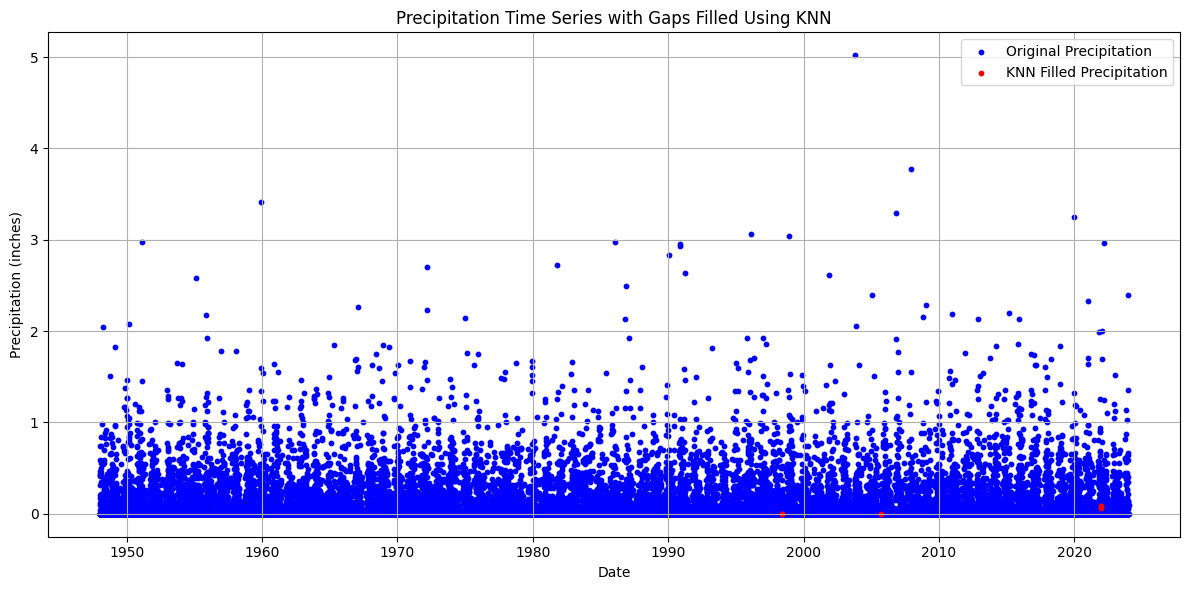

In [4]:
# Step 6: Plot the original and KNN-filled precipitation values
plt.figure(figsize=(12, 6))

# Original values in blue
plt.scatter(df_precip['DATE'], df_precip['PRCP'], color='blue', label='Original Precipitation', s=10)

# Highlight KNN-filled values in red
plt.scatter(filled_rows['DATE'], filled_rows['PRCP_filled_knn'], color='red', label='KNN Filled Precipitation', s=10)

# Titles and labels
plt.title('Precipitation Time Series with Gaps Filled Using KNN')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
file_path= '12105900_Discharge_1960_2023_Daily.txt'
# Reload the file with proper column names and check the data
df_discharge = pd.read_csv(file_path, sep='\t', comment='#', skiprows=31)
df_discharge.columns = ['agency_cd', 'site_no', 'datetime', 'discharge_cfs', 'status']

# Convert the datetime column to pandas datetime type
df_discharge['datetime'] = pd.to_datetime(df_discharge['datetime'], errors='coerce')

# Drop rows with invalid datetime
#df_discharge = df_discharge.dropna(subset=['datetime'])

In [6]:
df_discharge.index = df_discharge['datetime']
df1 = df_discharge['discharge_cfs']

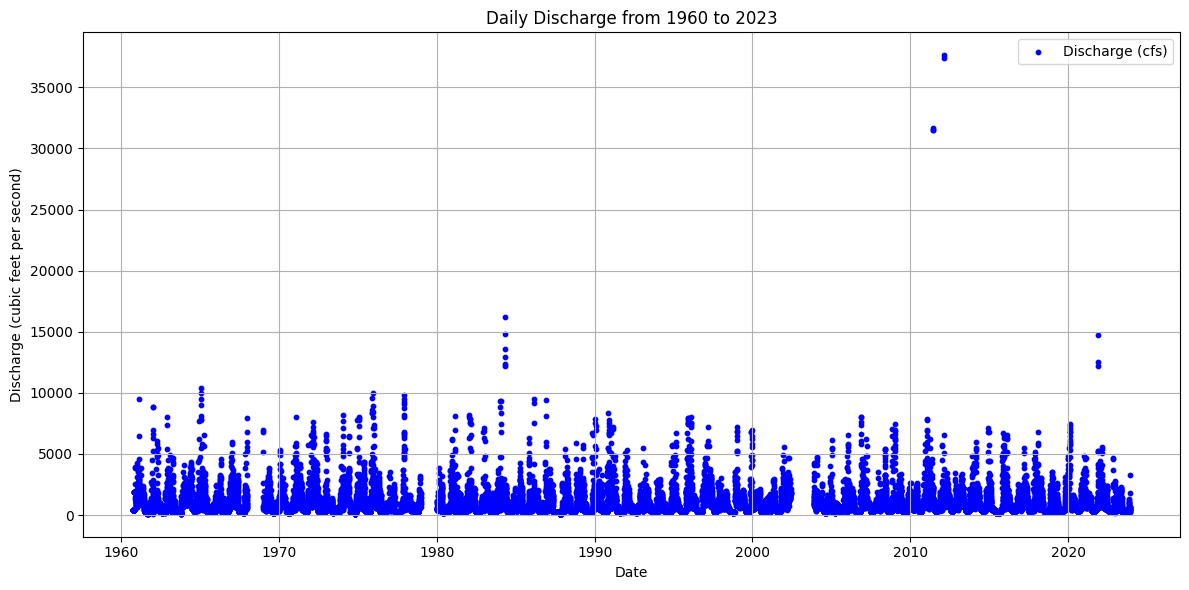

In [7]:
# Create a scatter plot for the discharge data over time
plt.figure(figsize=(12, 6))
plt.scatter(df1.index, df1, color='blue', s=10, label='Discharge (cfs)')
plt.title('Daily Discharge from 1960 to 2023')
plt.xlabel('Date')
plt.ylabel('Discharge (cubic feet per second)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
xx = df1.groupby(df1.index.dayofyear).mean()

In [9]:
ds1 = fill_data(df1, xx)

gaps = ds1[~ds1.index.isin(df1.index)].index
nogaps = ds1[ds1.index.isin(df1.index)].index
nogaps

DatetimeIndex(['1960-10-03', '1960-10-04', '1960-10-05', '1960-10-06',
               '1960-10-07', '1960-10-08', '1960-10-09', '1960-10-10',
               '1960-10-11', '1960-10-12',
               ...
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04',
               '2023-12-05', '2023-12-06'],
              dtype='datetime64[ns]', length=21814, freq=None)

In [10]:
df_precip.index = df_precip.DATE

df_rf = ds1.copy(deep=True)
df_rf['prcp'] = df_precip.PRCP_filled_knn
df_rf['time'] = np.arange(len(df_rf))

In [11]:
train_data = df_rf.loc[nogaps, ['time', 'discharge', 'prcp']]
test_data = df_rf.loc[gaps, ['time', 'prcp']]

X_train = train_data[['time', 'prcp']]  # Time feature
y_train = train_data['discharge']  # Known discharge values

rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)


if len(test_data) > 0:
    predicted_values = rf_model.predict(test_data[['time', 'prcp']])
    df_rf.loc[gaps, 'discharge'] = predicted_values

In [12]:
dsx = ds1.copy(deep=True)
ds1['day'] = np.arange(ds1.discharge.shape[0])

ds2 = ds1.loc[nogaps,:]
ds2.index = ds2.day
train_data = ds2['discharge']

ds4 = ds1.loc[gaps,:]
ds4.index = ds4.day
missing = ds4['discharge']
missing

,discharge
day,
2649,1548.283333
2650,1617.366667
2651,1584.116667
2652,1546.500000
2653,1808.050000
...,...
15742,1320.316667
15743,1340.450000
15744,1232.883333


In [ ]:
# train_data = ds1.loc[nogaps]

# Fit ARIMA model (we can use order=(1,1,1) for simplicity)
model = ARIMA(train_data, order=(5, 0, 5))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
predicted_values = model_fit.predict(start=missing.index[0], end=missing.index[-1])

dsx.iloc[missing]['discharge'] = predicted_values

<ipython-input-19-d98c96887a15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsx.iloc[missing]['discharge'] = predicted_values


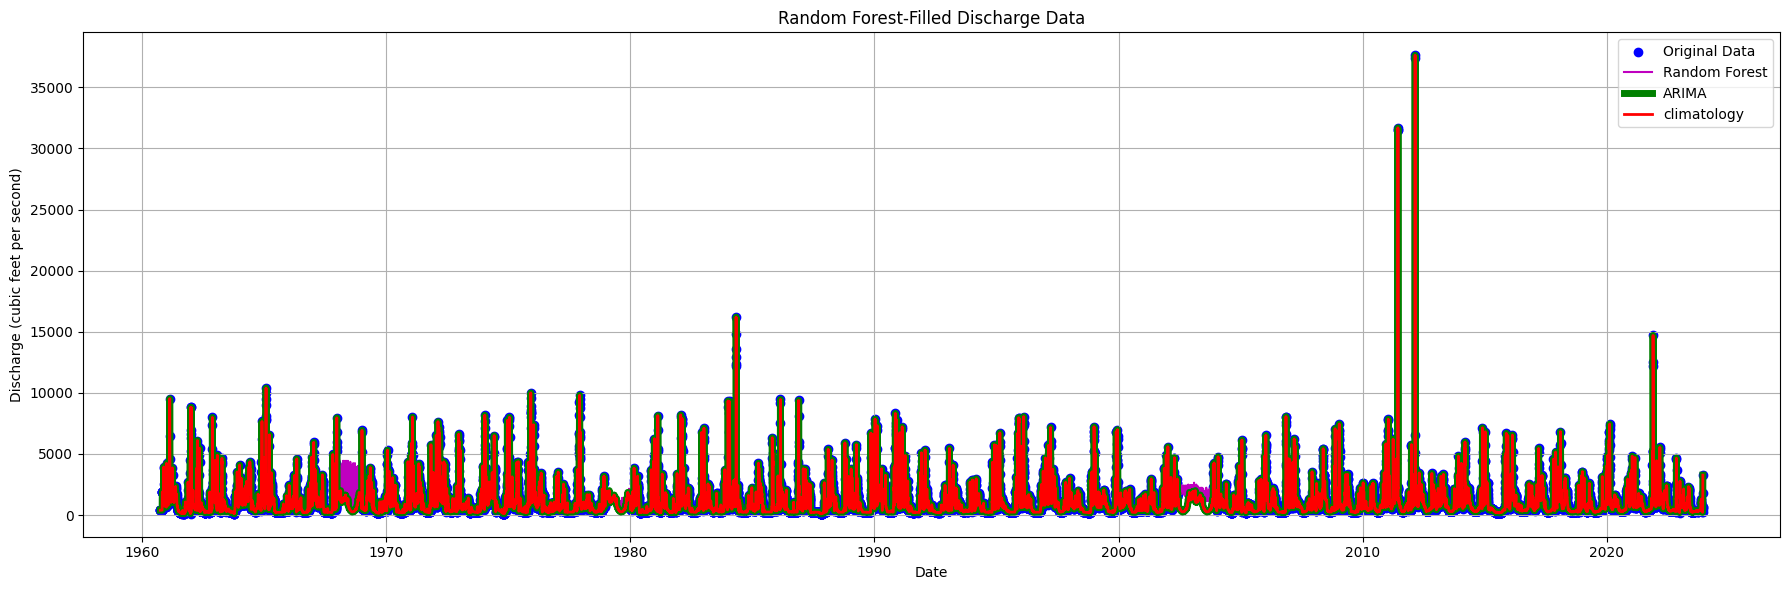

In [20]:
# Step 6: Visualize the result
plt.figure(figsize=(18, 6))

# Plot the original data (before filling gaps)
plt.scatter(nogaps, df1.loc[nogaps], color='b', label='Original Data')
plt.plot(df_rf.index, df_rf['discharge'], color='m', label='Random Forest')
plt.plot(dsx.index, dsx['discharge'], color='g', label='ARIMA', lw=5)
plt.plot(ds1.index, ds1.discharge, color='r', label='climatology', lw=2)

# Plot settings
plt.title('Random Forest-Filled Discharge Data')
plt.xlabel('Date')
plt.ylabel('Discharge (cubic feet per second)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Step 1: Use 'discharge' as the main variable and prepare training data (non-missing)
train_data = ds2['discharge']  # Data without gaps (from ds2)

# Step 2: Use auto_arima to find the best order (p, d, q) for ARIMA
auto_model = pm.auto_arima(train_data,
                           start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           d=None,  # Let auto_arima choose differencing
                           seasonal=True,  # Set to True for seasonal data
                           stepwise=True,
                           trace=True)

# Best ARIMA order found
print(f"Best ARIMA order: {auto_model.order}")

# Step 3: Fit ARIMA model on the non-missing data (ds2)
model = ARIMA(train_data, order=auto_model.order)
model_fit = model.fit()

# Step 4: Predict the missing values (ds4)
missing_days = ds4.index  # Index corresponding to missing values
predicted_values = model_fit.predict(start=missing_days[0], end=missing_days[-1])

# Step 5: Fill the missing values in dsx (copy of ds1)
# Step 5: Fill the missing values in dsx (copy of ds1)
dsx.loc[dsx['day'].isin(missing_days), 'discharge'] = predicted_values
# Use 'day' column to align the dataframes for filling missing values

# Step 6: Visualize the result
plt.figure(figsize=(12, 6))

# Plot the original data (before filling gaps)
plt.plot(dsx['day'], ds1['discharge'], color='blue', label='Original Data (with Gaps)', alpha=0.5)

# Plot the data with gaps filled using ARIMA
plt.plot(dsx['day'], dsx['discharge'], color='green', label='ARIMA-Filled Data')

# Plot settings
plt.title('ARIMA-Filled Discharge Data')
plt.xlabel('Day')
plt.ylabel('Discharge (cubic feet per second)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=339122.669, Time=5.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=370976.383, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=340755.732, Time=1.76 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=352599.461, Time=11.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=382883.032, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=339143.810, Time=11.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=339124.222, Time=8.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=343966.180, Time=18.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=339284.219, Time=4.00 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=339074.045, Time=14.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=338768.720, Time=16.52 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=338855.773, Time=21.16 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=338705.393, Time=36.94 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=338729.738, Time=22.40 s

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyError: 'day'